<div class="alert alert-block alert-warning">
<h1><span style="color:green"> Under-Graduate Research Internship Program (UGRIP) - 2024 <br> Lab 01 - Part C </span><h1>

<h2><span style="color:green"> Advanced Topics in Supervised Learning: Basis Function Regression, Underfitting/Overfitting, Regularization, Dimensionality Reduction, Advanced Evaluation Metrics</span><h2>
</div>

Now that you are familiar with the essentials of supervised ML algorithms, we're going to visit some important topics which touch on practical ML situations.

# 1. Basis Function Regression

A limitation of linear regression is that it is linear. That is, it assumes that the dependent and independent variables are related via linear functions. In practice, this assumption may not always be correct, as the data may come from very complex sources with high underlying complexity. In this case, you will notice that linear regression models will perform very badly on this sort of data.

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*. 

To put this in context, consider our univariate model. The idea is to take our single dimensional input $x$, and end up with a new model with this form:

$$ y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots + a_n x_n$$

where the "new" independent variables/features $x_1, x_2, x_3,$ are generated from our single-dimensional input $x$ via nonlinear transformations of $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$ y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_n x^n$$

Notice that this is *still a linear model* — the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. However, what we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can support/better model more complicated relationships between $x$ and $y$.

### Polynomial Basis Functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer. As the name suggests, this is an object that only "transforms" data i.e. it is not an Estimator, so it doesn't do any classification or regression, just converts data from one form to another:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression. In a sense this is similar to what SVMs do conceptually via their kernel functions (in fact here we are using what would be a degree 3 poly basis function). However, SVMs also do a similarity measurement in the projected space so its not exactly the same thing.

### SKLearn Pipelines

While it is clear from above that we can use the Sklearn `PolynomialFeatures` transformer to achieve this goal, it makes implementation a bit clunky because we have to do an extra projection step before fitting the model or using it for prediction. Wouldn't it be nice if we could somehow make the projection process seamless...almost part of the model itself?

To achieve this effect, we can use something called a pipeline. As the name suggests, a pipeline is a software object that applies a sequence of operations to our data. In this context, we have our data, and we want to transform it, then use it to fit a linear regression estimator. Then using pipelines, we can orchestrate this sequence as follows (using a 6th-degree polynomial transformation) as follows:

In [26]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(6),
                           LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

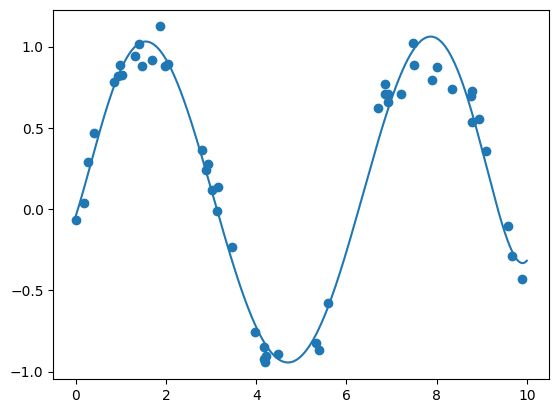

In [27]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

Our linear model, through the use of 6th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

Here we have used a Polynomial basis function of degree 7. However, there are many other families of basis functions e.g. gaussian basis functions. You can explore them later on your own.

# 2. Underfitting and Overfitting

In our previous session, we have briefly touched on the overfitting phenomenon and will go a bit deeper with it. But first, we will start with its no less troublesome sibling called underfitting.
Underfitting occurs when the model is not able to adequately capture the nature/behavior of the dataset it is trained on. For instance, let us revisit the above example, but try to use a simple Linear regression model to fit the data instead:

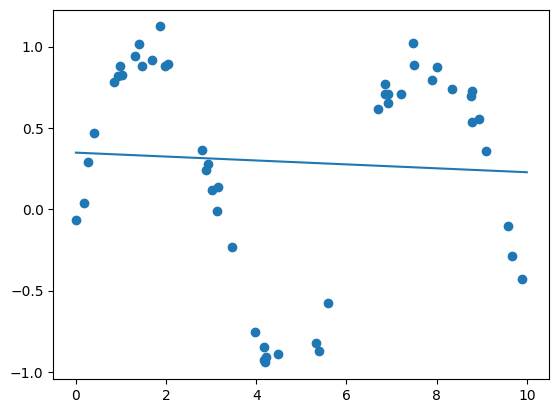

In [4]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

newLinearModel = LinearRegression()
newLinearModel.fit(x[:, np.newaxis], y)
yfit = newLinearModel.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

As you can see, the pure linear regression model is hopelessly unable to capture the data. 
This effect is also possible with classifiers. To demonstrate this, let us revisit the Iris classification problem from before with a Decision Tree classifier:

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
features, labels = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, train_size=0.75, random_state=1000)

dtc = DecisionTreeClassifier(max_depth=1, criterion='entropy').fit(X_train, Y_train)
print(f'Training Accuracy: {dtc.score(X_train, Y_train)}')
print(f'Testing Accuracy: {dtc.score(X_test, Y_test)}')

Training Accuracy: 0.6875
Testing Accuracy: 0.6052631578947368


What we have done differently here is to make the maximum depth of the tree 1 which makes it extremely shallow. Run the cell, record the result, then change the `max_depth` parameter to 10 and see the new result.

The reason for the disparity is the same as in the previous case: the model is too simplistic/not complex enough to capture the data. This is also evidenced by the poor performance of the classifier even on the training data (i.e. wide generalization gap). When we increase the model's expressive power e.g. by including more terms in the regression model or increasing its depth (in the case of the DT), then it is better at fitting the underlying data distribution which boosts its performance.

Armed with this knowledge, it becomes somewhat clear that overfitting is the opposite of this case. Now, the model is too complex, so it "marries" the training data too well, and is unable to work for unseen data. To illustrate this, we will revisit our regression example above, but increase the number of polynomial terms to 15, doubling its expressivity:

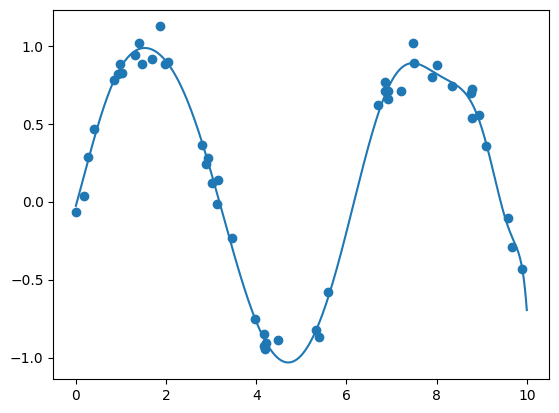

In [28]:
complex_poly_model = make_pipeline(PolynomialFeatures(15), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
complex_poly_model.fit(x[:, np.newaxis], y)
yfit = complex_poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

Visually you can see that the points are closer to the line than they were when we used a degree 6 polynomial. Now let us take the same model, but test it on a set of points going a bit beyond the training data e.g. x = 0 - 11 (where 10-11 is outside the training data):

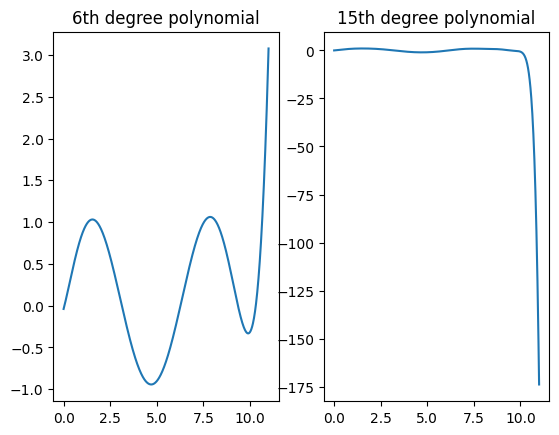

In [34]:
xfit = np.linspace(0, 11, 1000)
yfit1 = poly_model.predict(xfit[:, np.newaxis])
yfit2 = complex_poly_model.predict(xfit[:, np.newaxis])

fig, axes = plt.subplots(1,2)

axes[0].plot(xfit, yfit1)
axes[1].plot(xfit, yfit2)
axes[0].set_title('6th degree polynomial')
axes[1].set_title('15th degree polynomial')
plt.show()

It is apparent that the higher degree model - because it has more terms - is way more fragile because it is stuck on the training data, and therefore performs much more horribly on unseen data. 

Overfitting can also occur in classifiers. We saw this in the DT in the previous session. 
So we can briefly summarize these two phenomena as follows:
- Underfitting: low training and testing performance
- Overfitting: very high training performance, low testing performance

In the next section we will see how we can begin to tackle these issues.

# 3. Regularization

Now that we have studied underfitting and overfitting, we can consider ways to solve them. Usually overfitting is more common in practice because most models - even the simple ones - usually have enough capacity out of the box. Moreover, it is easy to increase the model capacity e.g by increasing the number of terms in regression carefully, or increasing tree depth/number of trees in DTs/RFs (respectively). However, blind increase in model complexity will likely lead to overfitting. Wouldn't it be nice if we could somehow learn (from the data) a suitable model complexity? That we would be much less likely to overfit, which is definitely a good thing.

Regularization is a technique that provides this ability. Basically, it allows you to train the model in a way that the complexity of the final model is somehow controlled or constrained, preventing it from becoming too complex. For instance, consider our usual linear regression model:

$$ y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots + a_n x_n$$

The model learns coefficients $a_i$ from data. When we use regularization, beyond some point, the model will try to set some of those coefficients to be very small (almost 0). This effectively controls the model complexity by "turning off" some of the terms, which is exactly what we need - by turning off the terms, then they are effectively removed from the model's final calculation.

We can actually get regularization out of the box with Sklearn. It provides a linear model called Ridge which includes regularization. Let us use it with our 6th degree polynomial above and see how it behaves:

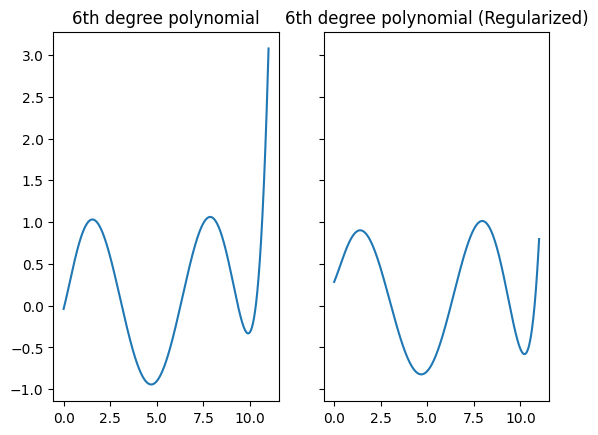

In [45]:
from sklearn.linear_model import Ridge
regularized_poly_model = make_pipeline(PolynomialFeatures(6), Ridge(alpha=2.0))

regularized_poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 11, 1000)
yfit1 = poly_model.predict(xfit[:, np.newaxis])
yfit2 = regularized_poly_model.predict(xfit[:, np.newaxis])

fig, axes = plt.subplots(1,2, sharey=True)

axes[0].plot(xfit, yfit1)
axes[1].plot(xfit, yfit2)
axes[0].set_title('6th degree polynomial')
axes[1].set_title('6th degree polynomial (Regularized)')
plt.show()


It is immediately clear that the regularized version works better for unseen data because of its controlled complexity. 

With classifiers, regularization is a bit tricker because of the different algorithms, so it is not always possible to apply mathematical constraints. However, many classifiers to an extent already have "self-regularizing" properties e.g. Random Forests, because of its use of bagging, is generally robust to overfitting even with many DTs inside it. SVMs are also good models because of their reliance on support vectors and the way they are trained/optimized. However, DTs and Logistic Regression don't have this properties.

The above is just to provide an intuition/background into regularization. As you move onto neural networks and more powerful models, you will encounter underfitting, overfitting and regularization again, so it is good to be prepared.

# 4. Dimensionality Reduction



Sometimes, the dimensionality can play a role in causing under/overfitting. Moreover, the larger the dimension of the data, the more computations need to be done which can take time. Some algorithms e.g. the kNN are particularly bad with high dimensions. As a general rule, high dimensionality also causes a higher data hunger i.e. the more dimensions you have, the more data you need (usually exponentially) to properly estimate the underlying data generation process.

It turns out that in many cases, not all of the data dimensions/features are actually useful for our downstream task. That is, if you have 1000 features, maybe just 10 of them are actually useful. If we can isolate those 10, then we might be able to get a more efficient learner - needing less data, will be speedier and can even give better performance (because sometimes these other features might be actively confusing the model).

Dimensionality Reduction as a whole is an entire direction of study in ML, and as you might imagine there are many algorithms and techniques that can be used for it. We will briefly discuss one of them here:

## Principal Components Analysis (PCA)

PCA is a linear dimensionality reduction technique. What it tries to do is to compute a limited (usually user-specified) number of new features. It does this by linearly combining the existing features with various weights/strengths. The reason this could work is because sometimes it is simply appropriate to look at the covariance of the data i.e. the way the data is spread in various axes, and compute features that maximize that variance and are orthogonal to each other i.e. independent of each other. You can think of this as kind of squashing the features in such a way that they are mashed or spread maximally.

Sklearn includes an implementation of PCA already (under the `sklearn.decomposition` module), so as usual we will use that. To illustrate, we will consider our WiFi localization problem from before which had bad performance with a decision tree classifier. Let us see what happens when we apply dimensionality reduction to this problem.

First, let us start with a draft or reference implementation:

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Load the data
trainData = np.loadtxt('validationData.csv', delimiter=',', skiprows=1) 
testData = np.loadtxt('trainingData.csv', delimiter=',', skiprows=1)

X_train, Y_train = trainData[:, :520], trainData[:, 522]
X_test, Y_test = testData[:, :520], testData[:, 522]

def shootout(clf):
    c = clf.fit(X_train, Y_train)
    trAcc, teAcc = accuracy_score(Y_train, clf.predict(X_train)), accuracy_score(Y_test, clf.predict(X_test))
    return trAcc, teAcc

trAcc3, teAcc3 = shootout(DecisionTreeClassifier(criterion='entropy'))
print(f'DTC: Training Accuracy = {trAcc3}, Testing Accuracy = {teAcc3}')

DTC: Training Accuracy = 0.9990999099909991, Testing Accuracy = 0.5770677634548829


Now, we will take fit a PCA transformer to the training data, then transform the training and testing data accordingly:

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100).fit(X_train, Y_train)
X_train, X_test = pca.transform(X_train), pca.transform(X_test)

def shootout(clf):
    c = clf.fit(X_train, Y_train)
    trAcc, teAcc = accuracy_score(Y_train, clf.predict(X_train)), accuracy_score(Y_test, clf.predict(X_test))
    return trAcc, teAcc

trAcc3, teAcc3 = shootout(DecisionTreeClassifier(criterion='entropy'))
print(f'DTC: Training Accuracy = {trAcc3}, Testing Accuracy = {teAcc3}')

DTC: Training Accuracy = 0.9990999099909991, Testing Accuracy = 0.5649295280132417


Basically, we have cut down from 519 features to 100 features and lost less than 1% in accuracy. Impressive!

# 5. Advanced Evaluation Metrics

Previously, we have used accuracy as our main evaluation metric. However, accuracy is not always the best metric to use. For instance, consider a binary classification problem where the positive class is very rare e.g. 1% of the data. If we were to build a classifier that always predicts the negative class, then we would get 99% accuracy. However, this is not a good classifier because it is not able to predict the positive class at all!

*quick recall:* Accuracy is the rate of correctly predicted samples out of all samples:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

To handle such cases, we have other evaluation metrics that can be used. Some of them are:

- **Precision**: This is the ratio of true positives to the sum of true positives and false positives. It is a measure of how many of the positive predictions are actually correct.
- **Recall (Sensitivity)**: This is the ratio of true positives to the sum of true positives and false negatives. It is a measure of how many of the actual positive samples were predicted correctly.
- **F1 Score**: This is the harmonic mean of precision and recall. It is a good metric to use when you want to balance the two.
- **ROC-AUC**: This is the area under the Receiver Operating Characteristic curve. It is a good metric to use when you want to balance the true positive rate and the false positive rate.

<center>

![confusion_matrix](https://miro.medium.com/v2/resize:fit:828/format:webp/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)

</center>

$$
\text{Precision} = \frac{TP}{TP + FP}, \quad \text{Recall} = \frac{TP}{TP + FN}, \quad \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


**ROC-AUC** is a bit more complicated. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The threshold is the value above which a sample is classified as positive. By default, this is 0.5. However, you can change this threshold to get different TPR and FPR values. The ROC curve is a plot of TPR against FPR at various threshold settings. The AUC is the area under this curve. The ROC-AUC is a good metric to use when you want to balance the true positive rate and the false positive rate.

TPR is the ratio of true positives to the sum of true positives and false negatives. It is a measure of how many of the actual positive samples were predicted correctly. FPR is the ratio of false positives to the sum of false positives and true negatives. It is a measure of how many of the actual negative samples were predicted incorrectly.

<center>

![ROC-AUC](https://miro.medium.com/v2/resize:fit:494/1*EPmzi0GCgdLstsJb6Q8e-w.png)

</center>

$$
\text{ROC-AUC} = \int_{0}^{1} \text{TPR} \, d\text{FPR}
$$

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

# Generate synthetic dataset
np.random.seed(42)
X = np.random.randn(1000, 20)
y = np.zeros(1000)
y[:100] = 1  # 100 positive cases to make it a bit less imbalanced

# Introduce a feature that helps differentiate the classes
X[:100, 0] += 2  # Shift the mean of the first feature for the positive class

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000, stratify=y) # stratified split to maintain the class balance (making sure that the same proportion of positive and negative cases are present in both training and testing sets)

Accuracy: 0.912
Confusion Matrix:


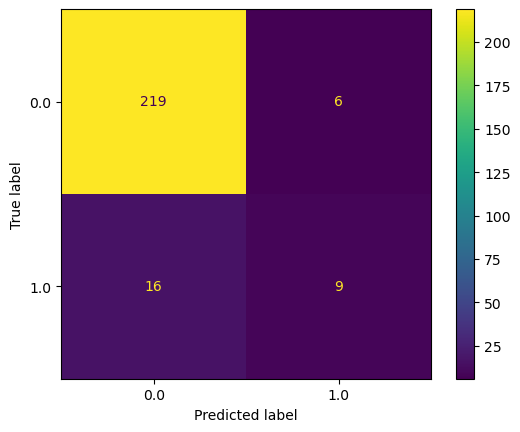

In [73]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model using different metrics
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

As you can see from the confusion matrix, the model fails to identify any of the positive samples. This is a case where accuracy is not a good metric to use (as it's showing 0.952 accuracy). However, if we were to use precision, recall, F1 score or ROC-AUC, then we would be able to see that the model is not performing well.

In [74]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import RocCurveDisplay

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       225
         1.0       0.60      0.36      0.45        25

    accuracy                           0.91       250
   macro avg       0.77      0.67      0.70       250
weighted avg       0.90      0.91      0.90       250



ROC AUC Score: 0.8709333333333333


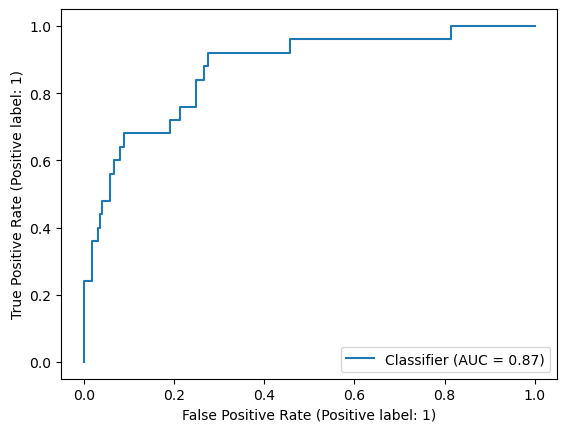

In [71]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {roc_auc}")

RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()